In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import numpy as np

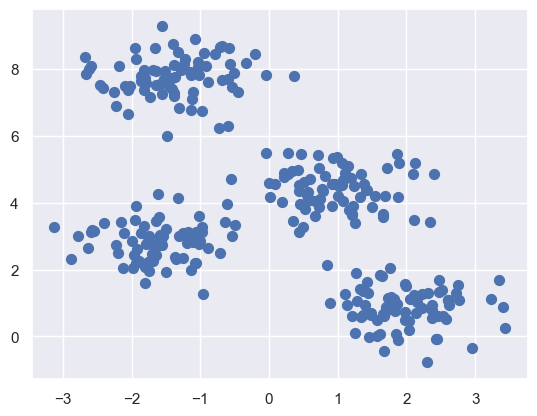

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, Y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)


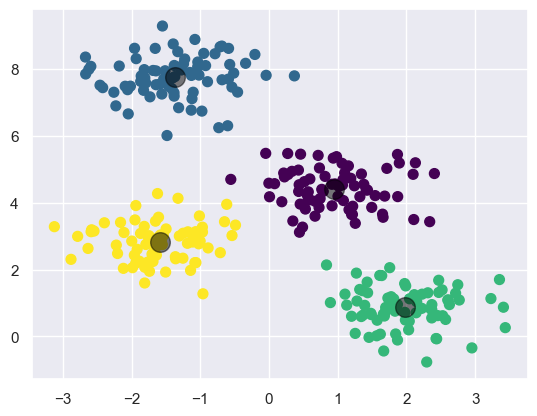

In [16]:
from sklearn.metrics import pairwise_distances_argmin_min

def find_cluster(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels, _ = pairwise_distances_argmin_min(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
            
        centers = new_centers
        
    return centers, labels

centers, labels = find_cluster(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)


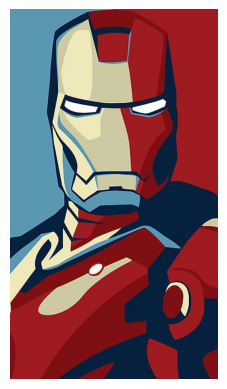

In [19]:
from skimage.io import imread
import matplotlib.pyplot as plt

image_path = "ironman.jpg"  
china = imread(image_path)

plt.imshow(china)
plt.axis('off')
plt.show()


In [20]:
china.shape

(622, 350, 3)

In [22]:
data = china / 255.0
data = data.reshape(china.shape[0] * china.shape[1], china.shape[2])
data.shape


(217700, 3)

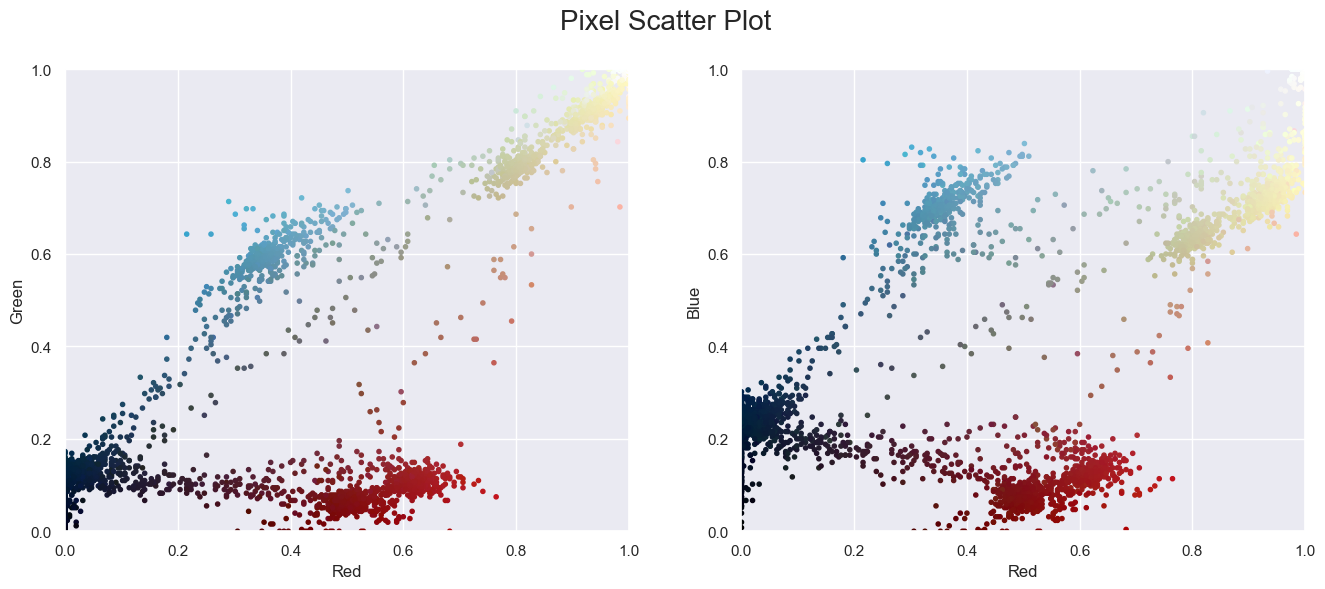

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)
    plt.show()



plot_pixels(data, "Pixel Scatter Plot")


        

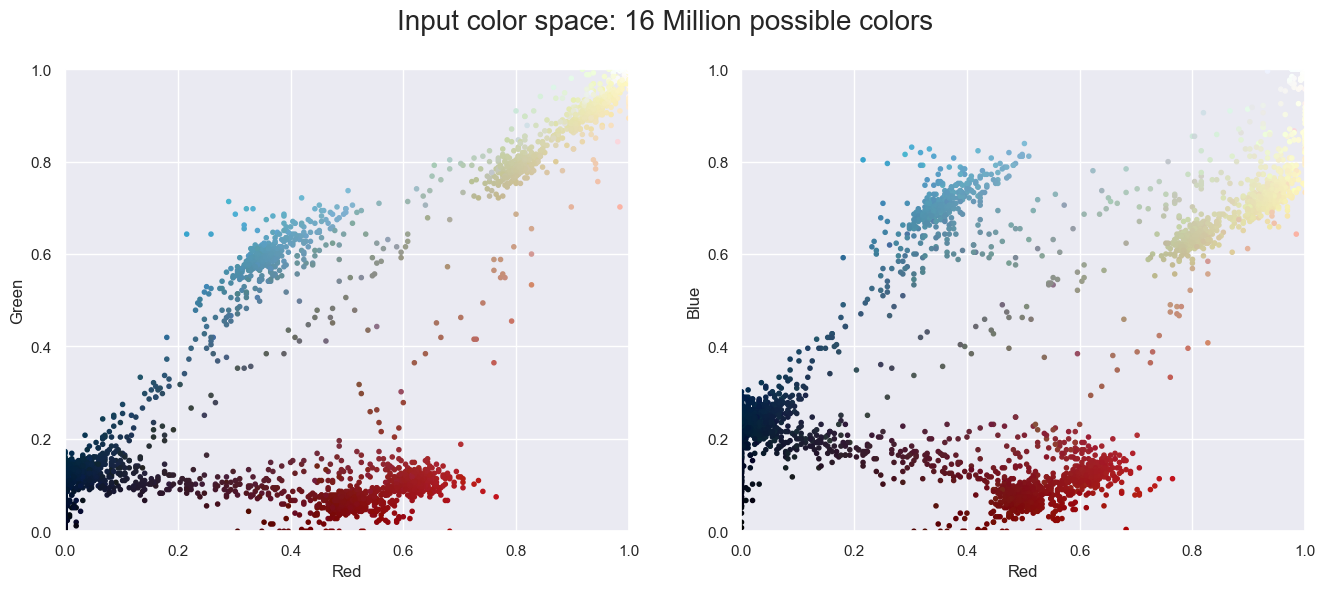

In [26]:
plot_pixels(data,title='Input color space: 16 Million possible colors')

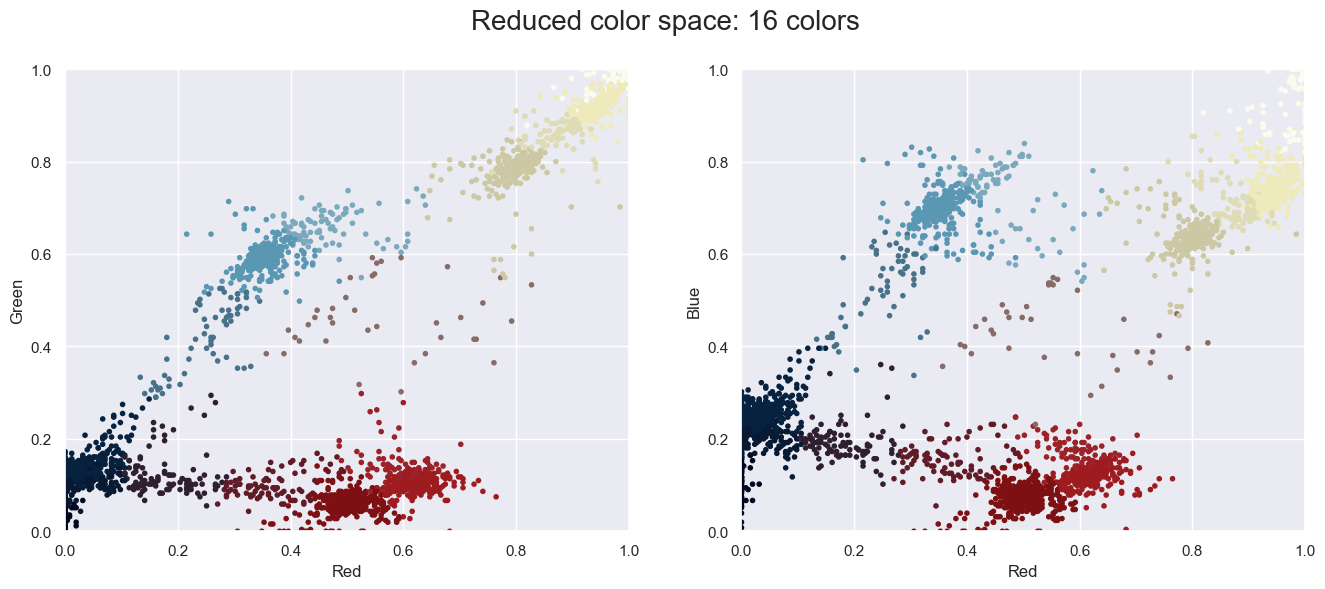

In [28]:
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")


Text(0.5, 1.0, '16-color Image')

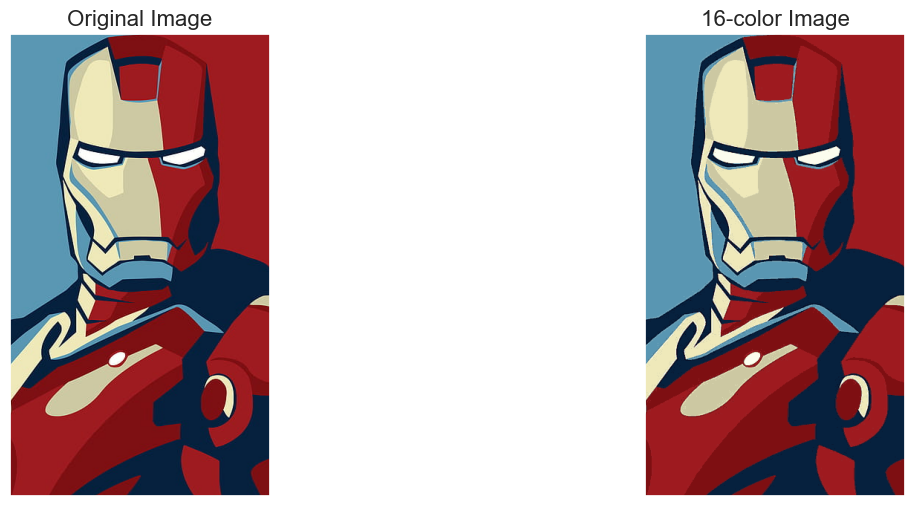

In [30]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)


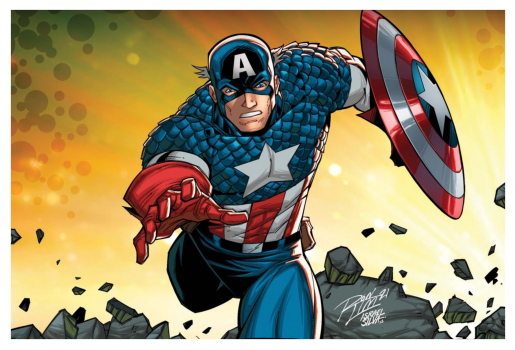

In [33]:
from skimage.io import imread
import matplotlib.pyplot as plt

image_path = "captainamerica.jpg"
russia = imread(image_path)

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(russia)


In [34]:
russia.shape

(1000, 1500, 3)

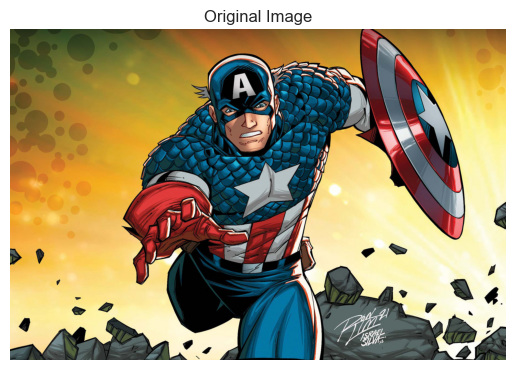

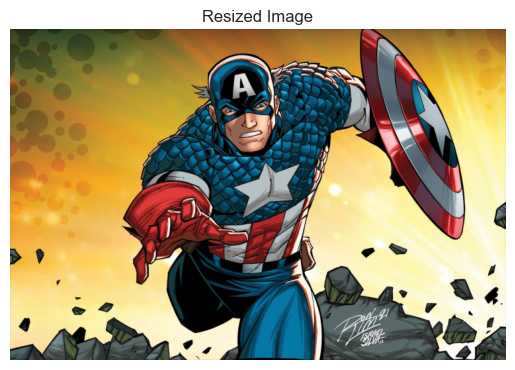

Resized image shape: (500, 750, 3)


In [54]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

image_path = "captainamerica.jpg"
russia = imread(image_path)


plt.imshow(russia)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Resize the image to a new shape
new_shape = (500, 750)  # Specify the desired shape
russia_resized = resize(russia, new_shape, mode='constant')

# Display the resized image
plt.imshow(russia_resized)
plt.title('Resized Image')
plt.axis('off')
plt.show()

# Print the shape of the resized image
print("Resized image shape:", russia_resized.shape)
